# importing libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# loading the Dataset

In [2]:
cardiodata = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')

In [3]:
cardiodata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Shape of the data**

In [5]:
cardiodata.shape

(180, 9)

**Checking for the null values **

In [6]:
cardiodata.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

****All columns of the input will be included in the output.

In [7]:
cardiodata.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


# Histograms

This histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd06ce110>,
      dtype=object)

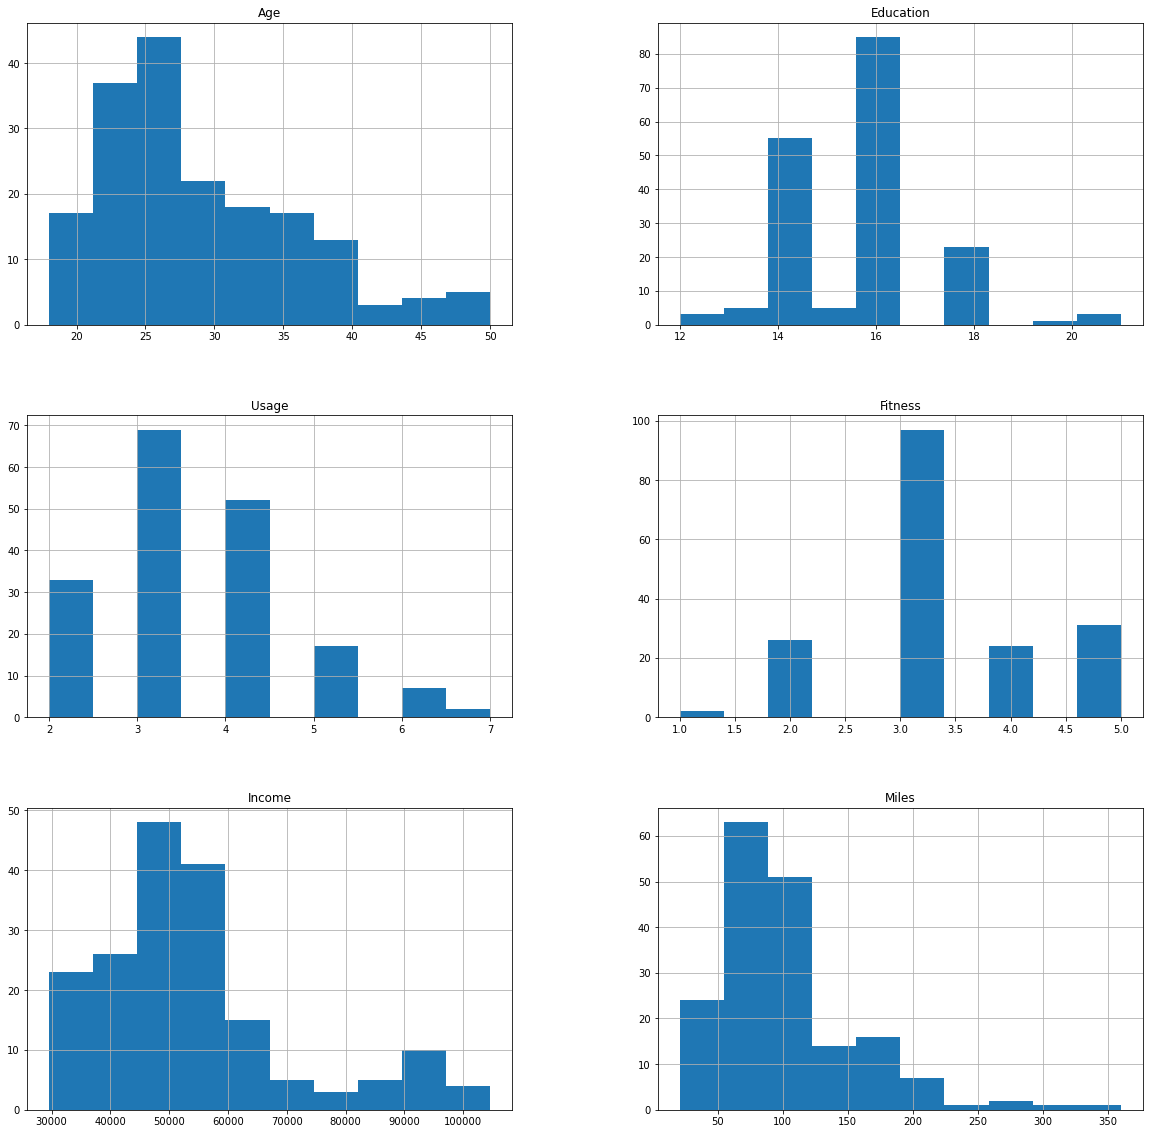

In [8]:
cardiodata.hist(figsize=(20,20))

# Boxplots

**#Which is the most popular model by gender?**

In [9]:
pd.crosstab(cardiodata['Product'],cardiodata['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


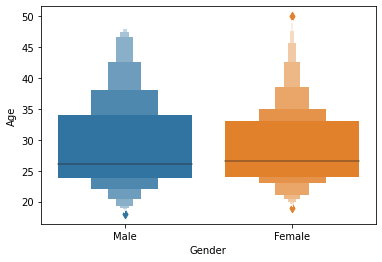

In [10]:
sns.boxenplot(x='Gender',y='Age',data=cardiodata)

In [11]:
pd.crosstab(cardiodata['Product'],cardiodata['MaritalStatus'] )


MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


**seperated data by Gender**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdd01529d0>,
      dtype=object)

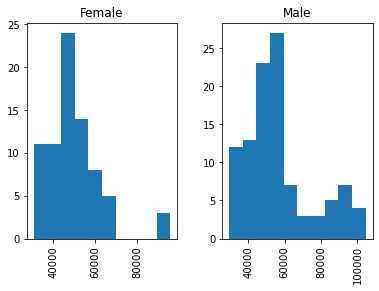

In [12]:
cardiodata.hist(by='Gender',column = 'Income')

**average of Age**

In [13]:
cardiodata['Age'].mean()

28.788888888888888

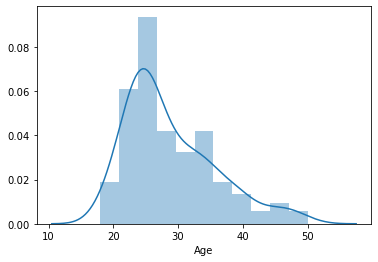

In [14]:
sns.distplot(cardiodata['Age'])

# Count Plot
x= number of each product
hue= seperated by  Gender

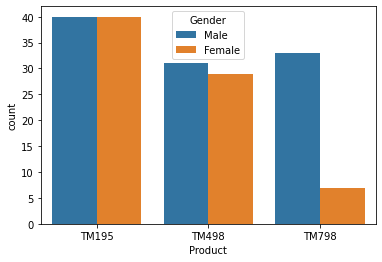

In [15]:
sns.countplot(x='Product',hue='Gender',data=cardiodata)

# pairplot
** Quick overview of the data**

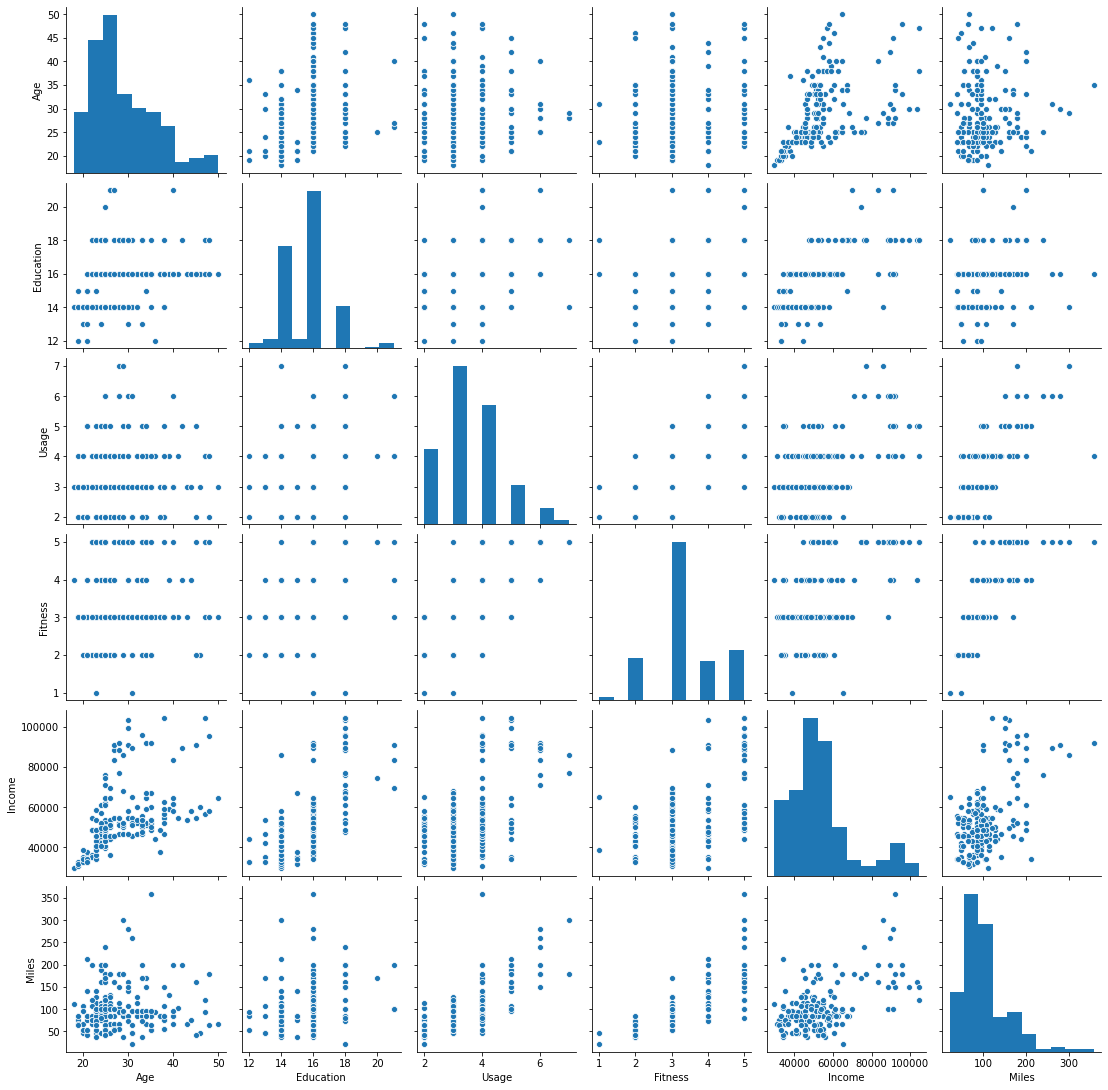

In [16]:
sns.pairplot(cardiodata)

# Corelation Heat Map

In [17]:
corr=cardiodata.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


# heatmap
**Overview of the correlation of the different variables**

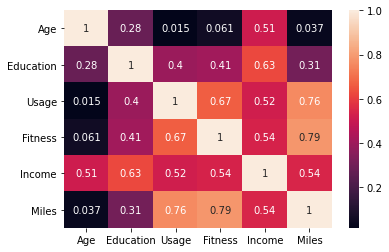

In [18]:
sns.heatmap(corr,annot=True)

# How do income and age affect the decision of which model is bought?
 We can infer that TM798 is the more expensive model

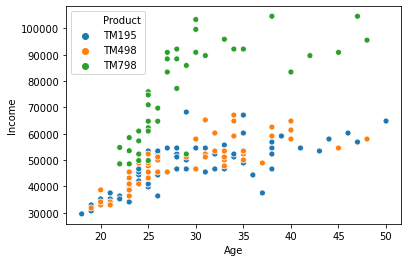

In [19]:
sns.scatterplot(x='Age', y='Income',data=cardiodata, hue = 'Product')
plt.show()